# Laboratorio 5 #

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

## Funciones Predeterminadas ##

Cargamos las funciones que vamos a usar posteriormente

In [86]:
def linear_cost(X, y, theta, lamb):
    h = X @ theta
    lamb = (lamb/(2*len(X)))*(theta**2).sum()
    return ((y-h)**2).sum()/(2*len(X))+lamb

def linear_gradient_cost(X, y, theta, lamb):
    h = X @ theta
    return(((h-y).T @ X).T+lamb)/len(X)

def gradient_descent_cost(X, y, theta_0, lin_func, lin_grad, learning_rate=0.0000001, threshold=0.0001, max_iter=1000, lamb=10):
    theta=theta_0
    iteration=0
    costs=[]
    thetas=[]
    while np.linalg.norm(lin_grad(X, y, theta, lamb)) > threshold and iteration < max_iter:
        iteration+=1
        theta=theta-(learning_rate*lin_grad(X,y,theta,lamb))
        costs.append(lin_func(X,y,theta,lamb))
        thetas.append(theta.copy())
    return theta, costs, thetas

Exploración inicial de los datos para observar el tamaño de la data y cómo se distribuyen los datos. Además agregaremos una columna de números 1.

In [60]:
dataset = pd.read_csv('Admission_Predict.csv')
dataset.head(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [61]:
dataset['unos'] = 1
cols = dataset.columns.tolist()
cols = cols[-1:] + cols[:-1]
dataset = dataset[cols]
dataset.head(5)

,unos,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,1,337,118,4,4.5,4.5,9.65,1,0.92
1,1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,1,3,316,104,3,3.0,3.5,8.00,1,0.72
3,1,4,322,110,3,3.5,2.5,8.67,1,0.80
4,1,5,314,103,2,2.0,3.0,8.21,0,0.65


In [62]:
dataset2 = dataset.sample(frac=1)
dataset2.head(5)

,unos,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
276,1,277,329,113,5,5.0,4.5,9.45,1,0.89
100,1,101,322,107,3,3.5,3.5,8.46,1,0.71
237,1,238,329,114,5,4.5,5.0,9.19,1,0.86
24,1,25,336,119,5,4.0,3.5,9.80,1,0.97
164,1,165,329,111,4,4.5,4.0,9.01,1,0.81


In [63]:
dataset2 = np.array(dataset2)
dataset2

array([[  1.  , 277.  , 329.  , ...,   9.45,   1.  ,   0.89],
       [  1.  , 101.  , 322.  , ...,   8.46,   1.  ,   0.71],
       [  1.  , 238.  , 329.  , ...,   9.19,   1.  ,   0.86],
       ...,
       [  1.  ,  98.  , 331.  , ...,   8.96,   1.  ,   0.86],
       [  1.  ,  44.  , 332.  , ...,   9.1 ,   0.  ,   0.87],
       [  1.  ,  41.  , 308.  , ...,   8.  ,   1.  ,   0.46]])

### División de la data ###

Separamos la data en train, test y cross validaton para su uso en los modelos y pruebas.

In [64]:
train, val, test = np.split(dataset2, [int(len(dataset2)*0.7), int(len(dataset2)*0.8)])

X_train = train[:,0:9]
y_train = train[:,9].reshape(len(X_train),1)
X_test = test[:,0:9]
y_test = test[:,9].reshape(len(X_test),1)
X_val = val[:,0:9]
y_val = val[:,9].reshape(len(X_val),1)

## Polinomio de Grado 1 #

In [ ]:
m, n = X_train.shape
theta_rand_1 = np.random.rand(n,1)

In [87]:
theta_r1, costs_1, thetas_1 = gradient_descent_cost(X_train, y_train, theta_rand_1, linear_cost, linear_gradient_cost, lamb=10)
theta_r1

array([[ 0.83389362],
       [ 0.12138754],
       [-0.20633698],
       [ 0.25042936],
       [ 0.81420689],
       [ 0.96184383],
       [ 0.84162079],
       [ 0.34097451],
       [ 0.57980078]])

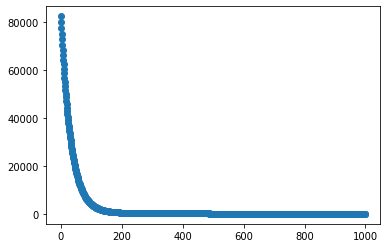

In [88]:
graph = np.arange(0,1000,1).reshape(-1,1)
plt.scatter(graph,costs_1)
plt.show()

In [89]:
costs_1[-1]

99.70742196020083

In [92]:
print(linear_cost(X_val,y_val,theta_r1,lamb=10))
print(linear_cost(X_test,y_test,theta_r1, lamb=10))

91.50156182201275
92.98978521984586


## Polinomio de Grado 2 #

Creamos el polinomio de grado 2

In [93]:
pol_grado_2_train = (X_train[:,1] ** 2).reshape(len(X_train), 1)
X_train_2 = np.append(X_train, pol_grado_2_train, axis = 1)
pol_grado_2_test = (X_test[:,1] ** 2).reshape(len(X_test), 1)
X_test_2 = np.append(X_test, pol_grado_2_test, axis = 1)
pol_grado_2_val = (X_val[:,1] ** 2).reshape(len(X_val), 1)
X_val_2 = np.append(X_val, pol_grado_2_val, axis = 1)

In [94]:
m2, n2 = X_train_2.shape
theta_rand_2 = np.random.rand(n2,1)

In [97]:
theta_r2, costs_2, thetas_2 = gradient_descent_cost(X_train_2, y_train, theta_rand_2, linear_cost, linear_gradient_cost, learning_rate = 0.0000000001)
theta_r2

array([[ 0.2920329 ],
       [ 0.74132927],
       [ 0.02832419],
       [ 0.90391403],
       [ 0.67385353],
       [ 0.9554217 ],
       [ 0.60229612],
       [ 0.84495614],
       [ 0.31760199],
       [-0.00350024]])

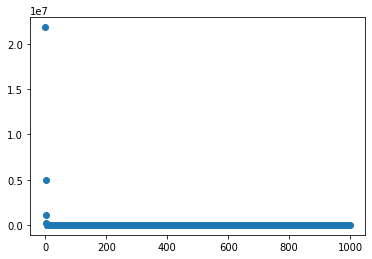

In [98]:
graph = np.arange(0,1000,1).reshape(-1,1)
plt.scatter(graph,costs_2)
plt.show()

In [101]:
costs_2[-1]

7486.627663059394

In [100]:
print(linear_cost(X_val_2,y_val,theta_r2,lamb=10))
print(linear_cost(X_test_2,y_test,theta_r2, lamb=10))

7256.867798765784
6609.156920672766


# Polinomio de Grado 3 #

Creamos el polinomio de grado 3

In [102]:
pol_grado_3_train = (X_train[:,1] ** 3).reshape(len(X_train), 1)
X_train_3 = np.append(X_train, pol_grado_3_train, axis = 1)
pol_grado_3_test = (X_test[:,1] ** 3).reshape(len(X_test), 1)
X_test_3 = np.append(X_test, pol_grado_3_test, axis = 1)
pol_grado_3_val = (X_val[:,1] ** 3).reshape(len(X_val), 1)
X_val_3 = np.append(X_val, pol_grado_3_val, axis = 1)

In [103]:
m3, n3 = X_train_3.shape
theta_rand_3 = np.random.rand(n3,1)

In [108]:
theta_r3, costs_3, thetas_3 = gradient_descent_cost(X_train_3, y_train, theta_rand_3, linear_cost, linear_gradient_cost, learning_rate = 0.000000001)
theta_r3

C:\Users\GUILLERMO\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in square
  after removing the cwd from sys.path.
C:\Users\GUILLERMO\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in square
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\GUILLERMO\anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in matmul
  
C:\Users\GUILLERMO\anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in matmul
  


array([[2.53902227e+293],
       [8.22614646e+295],
       [7.99908207e+295],
       [2.69385073e+295],
       [7.14523441e+293],
       [8.04067030e+293],
       [8.28917047e+293],
       [2.16522169e+294],
       [1.31550478e+293],
       [            inf]])

# Conclusiones #

Observamos que con el grado 2 y 3 la data no funciona a comparación del polinomio de grado 1, por lo que aseguramos que ese es el grado óptimo de entre los 3 grados.